In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_df.shape

(60000, 785)

In [5]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [6]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,1,0,0,5,3,0,0,...,74,57,23,0,0,0,86,103,24,0
1,1,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,64,42,24,0,0,0,0,0


In [7]:
LOOKUP = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'Pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal', 
          6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag', 
          9: 'Ankle boot'}

In [8]:
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [9]:
fashion_mnist_df.to_csv('datasets/fashion-mnist_train_30p.csv')

In [10]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

Y = fashion_mnist_df['label']

In [11]:
X.head(), Y.head()

(   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0       0       0       1       0       0       5       3       0       0   
 1       0       0       0       0       0       0       0       0       6   
 2       0       0       0       0       0       0       0       0       0   
 3       0       0       0       0       0       0       0       0       0   
 4       0       0       0       0       0       0       0       0       0   
 
    pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0        0  ...        74        57        23         0         0         0   
 1        0  ...         0         0         0         0         0         0   
 2        0  ...         0         0         0         0         0         0   
 3        0  ...         0         0         0         0         0         0   
 4        0  ...         0         0        64        42        24         0   
 
    pixel781  pixel782  pixel783  pixel784  
 0 

Actual label:  Shirt


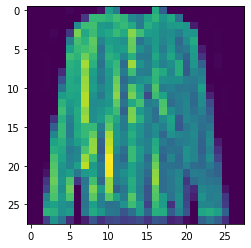

In [12]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Coat


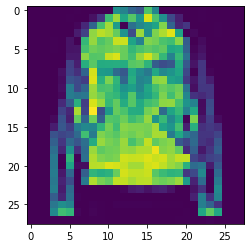

In [13]:
display_image(X.loc[567].values, Y.loc[567])

Actual label:  Dress


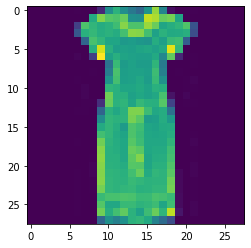

In [14]:
display_image(X.loc[15088].values, Y.loc[15088])

In [15]:
# Scaling the data
X = X/255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.003922,0.0,0.0,0.019608,0.011765,0.0,0.000000,0.0,...,0.290196,0.223529,0.090196,0.000000,0.000000,0.0,0.337255,0.403922,0.094118,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.023529,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.250980,0.164706,0.094118,0.0,0.000000,0.000000,0.000000,0.0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
def summarize_classification(y_test, 
                             y_pred, 
                             avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

### Algorithm to use in the optimization problem.
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

In [18]:
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [19]:
y_pred = logistic_model.predict(x_test)

y_pred

array([6, 6, 3, ..., 1, 8, 4], dtype=int64)

In [20]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count :  3035
accuracy_score :  0.8430555555555556
precision_score :  0.8423665231372119
recall_score :  0.8430555555555556


In [21]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

pred_results.sample(20)

,y_test,y_pred
13351,0,0
10462,2,2
8344,2,4
8525,9,9
11282,1,1
2008,4,4
8546,1,1
950,4,6
9942,2,2
12561,1,1
